# Statistical Analysis: Cathegories and the Number of Ratings/Reviews

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
USERS_PARQUET_PATH = "RefinedData/BeerAdvocate/users_with_scores.parquet"
users_df = pd.read_parquet(USERS_PARQUET_PATH)

In [14]:
users_df.describe()

,n_ratings,n_reviews,cfm_score,exp_score,xpl_score,adv_score,is_cfm,is_exp,is_xpl,is_adv
count,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000
mean,132.140068,41.577222,-1.521565,-0.455170,0.087978,0.072911,0.100004,0.029593,0.136058,0.100004
std,387.875528,221.338522,1.863792,0.210935,0.130990,0.125241,0.300007,0.169463,0.342853,0.300007
min,5.000000,0.000000,-63.747995,-3.542857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,-1.774929,-0.525845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,1.000000,-1.085113,-0.413928,0.043478,0.017544,0.000000,0.000000,0.000000,0.000000
75%,88.000000,10.000000,-0.680349,-0.331429,0.125000,0.095238,0.000000,0.000000,0.000000,0.000000
max,12046.000000,8970.000000,-0.003932,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
CMAP = {
    "CFM": "#4477AA",
    "XPL": "#228833",
    "EXP": "#CCBB44",
    "ADV": "#AA3377"
}

### Number of Ratings

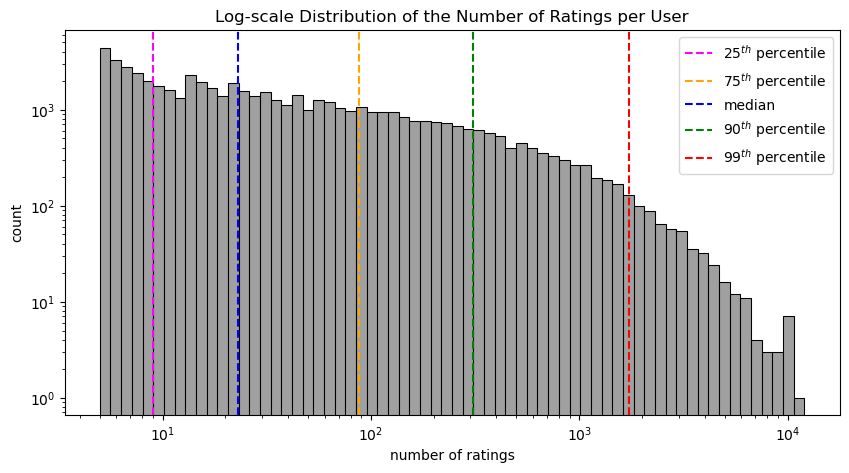

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=users_df, x="n_ratings", log_scale=(True, True), ax=ax, color="grey")
ax.axvline(x=users_df.n_ratings.quantile(0.25), color="magenta", ls="--", label=r"$25^{th}$ percentile")
ax.axvline(x=users_df.n_ratings.quantile(0.75), color="orange", ls="--", label=r"$75^{th}$ percentile")
ax.axvline(x=users_df.n_ratings.median(), color="blue", ls="--", label="median")
ax.axvline(x=users_df.n_ratings.quantile(0.9), color="green", ls="--", label=r"$90^{th}$ percentile")
ax.axvline(x=users_df.n_ratings.quantile(0.99), color="red", ls="--", label=r"$99^{th}$ percentile")
ax.set_xlabel("number of ratings")
ax.set_ylabel("count")
ax.set_title("Log-scale Distribution of the Number of Ratings per User")
ax.legend();

In [33]:
n_ratings_intervals = [users_df.n_ratings.min(), 10, 50, 100, 500, 1750]

percs={
    "CFM_p": [],
    "XPL_p": [],
    "EXP_p": [],
    "ADV_p": []
}
bounds=[]

for i in range(1, len(n_ratings_intervals)):
    if i == 1:
        lowerbound = users_df.n_ratings.min()
    else:
        lowerbound = n_ratings_intervals[i-1]
    upperbound = n_ratings_intervals[i]
    bounds.append("(%d,%d]"%(lowerbound, upperbound))
    
    users_in_interval_df = users_df.query("@lowerbound < n_ratings and n_ratings <= @upperbound")
    
    percs["CFM_p"].append(users_in_interval_df['is_cfm'].mean()*100)
    percs["EXP_p"].append(users_in_interval_df['is_exp'].mean()*100)
    percs["XPL_p"].append(users_in_interval_df['is_xpl'].mean()*100)
    percs["ADV_p"].append(users_in_interval_df['is_adv'].mean()*100)
    
p_by_n_ratings_df = pd.DataFrame(
    data={"bounds": bounds, 
          "CFM_p": percs["CFM_p"], 
          "XPL_p": percs["XPL_p"], 
          "EXP_p": percs["EXP_p"],
          "ADV_p": percs["ADV_p"]
          })

fig1 = go.Figure()

for name in percs.keys():
    catname = name.split("_")[0]
    fig1.add_scatter(
        x=p_by_n_ratings_df.bounds.values,
        y=p_by_n_ratings_df[name].values,
        name=catname,
        mode="lines",
        marker_color=CMAP[catname])

fig1.update_layout(
    title_text="Empirical Likelihood of a Rater belonging to a Cathegory as a function of the User's Number of Ratings",
    yaxis_title="Empirical likelihood",
    xaxis_title="Range of the number of ratings",
    
    barmode='stack',
    
    width=900, height=400,
    margin=dict(l=20, r=20, t=40, b=40),
    #paper_bgcolor="rgba(0,0,0,0)",
    #plot_bgcolor="rgba(0,0,0,0)"
    )    

fig1.show()

### Number of Reviews

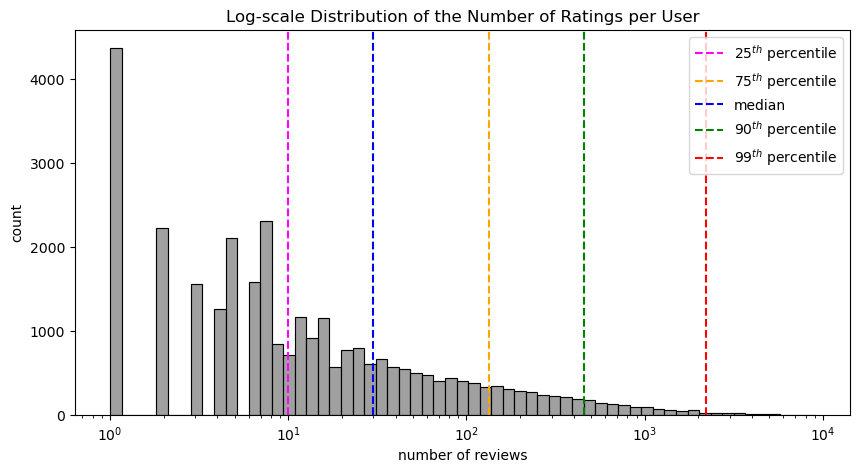

In [18]:
users_with_reviews_df = users_df.query("n_reviews > 0")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=users_with_reviews_df, x="n_reviews", log_scale=True, ax=ax, color="grey")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.25), color="magenta", ls="--", label=r"$25^{th}$ percentile")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.75), color="orange", ls="--", label=r"$75^{th}$ percentile")
ax.axvline(x=users_with_reviews_df.n_ratings.median(), color="blue", ls="--", label="median")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.9), color="green", ls="--", label=r"$90^{th}$ percentile")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.99), color="red", ls="--", label=r"$99^{th}$ percentile")
ax.set_xlabel("number of reviews")
ax.set_ylabel("count")
ax.set_title("Log-scale Distribution of the Number of Ratings per User")
ax.legend();

In [34]:
n_reviews_intervals = [0, 10, 30, 150, 500, 2250]

percs2={
    "CFM_p": [],
    "XPL_p": [],
    "EXP_p": [],
    "ADV_p": []
}
bounds2=[]

for i in range(1, len(n_reviews_intervals)):
    lowerbound = n_reviews_intervals[i-1]
    upperbound = n_reviews_intervals[i]
    bounds2.append("(%d,%d]"%(lowerbound, upperbound))
    
    users_in_interval_df = users_with_reviews_df.query("@lowerbound < n_reviews and n_reviews <= @upperbound")
    
    percs2["CFM_p"].append(users_in_interval_df['is_cfm'].mean()*100)
    percs2["EXP_p"].append(users_in_interval_df['is_exp'].mean()*100)
    percs2["XPL_p"].append(users_in_interval_df['is_xpl'].mean()*100)
    percs2["ADV_p"].append(users_in_interval_df['is_adv'].mean()*100)
    
p_by_n_reviews_df = pd.DataFrame(
    data={"bounds": bounds2, 
          "CFM_p": percs2["CFM_p"], 
          "XPL_p": percs2["XPL_p"], 
          "EXP_p": percs2["EXP_p"],
          "ADV_p": percs2["ADV_p"]
          })

fig2 = go.Figure()

for name in percs2.keys():
    catname = name.split("_")[0]
    fig2.add_scatter(
        x=p_by_n_reviews_df.bounds.values,
        y=p_by_n_reviews_df[name].values,
        name=catname,
        mode="lines",
        marker_color=CMAP[catname])

fig2.update_layout(
    title_text="Empirical Likelihood of a Reviewer belonging to a Cathegory as a function of the User's Number of Reviews",
    yaxis_title="Empirical likelihood",
    xaxis_title="Range of the number of reviews",
    
    barmode='stack',
    
    width=900, height=400,
    margin=dict(l=20, r=20, t=40, b=40),
    #paper_bgcolor="rgba(0,0,0,0)",
    #plot_bgcolor="rgba(0,0,0,0)"
    )    

fig2.show()

In [32]:
#fig1.write_html("ratings_and_cathegory_proba_analysis.html")
#fig2.write_html("reviews_and_cathegory_proba_analysis.html")